<h2>Desafio 2 - Machine Learning


<h3>Grupo 7</h3>
<ul>
    <li>Ignacio Mendieta</li>
    <li>Laura Jazmín Chao</li>
    <li>Juan Nicolás Capistrano</li>
    <li>Betiana Srur</li>
    <li>Marecelo Carrizo</li>
    
</ul>
    

<h4>Objetivo</h4>
Aplicar las ténicas de Machine Learning sobre el dataset de Properati para calcular automáticamente el precio por metro cuadrado de las propiedades. 

<a id="section_toc"></a> 
<h2> Tabla de Contenidos </h2>

[Librerías](#section_import)

[Dataset](#section_dataset)

[Selección de los datos](#section_selection)

[Limpieza de datos](#section_limpieza)

[Imputación de datos faltantes](#section_imput)

$\hspace{.5cm}$[Imputamos datos de surface](#section_surface)

$\hspace{.5cm}$[Imputamos datos de price_usd_per_m2](#section_price)

$\hspace{.5cm}$[Creación de datos para imputación de rooms](#section_categories)
       
[Extracción de datos de <strong>descriptcion</strong>](#section_description)   
    
$\hspace{.5cm}$[Cantidad de ambientes](#section_amb)

$\hspace{.5cm}$[Amenities](#section_caba_description_amenities)
    
[Creación de dummies sobre datos catgóricos](#section_dummies)
    
[Mapa de correlación de datos cuantitativos](#section_corrheatmap)   
    
[Modelos de Regresión](#section_model)
    
$\hspace{.5cm}$[Primeras pruebas](#section_test1)  
    
$\hspace{.5cm}$[Pruebas con Lasso](#section_test_lasso1)  

[Definición de Outliers](#section_outliers)  

[Pruebas con datos ajustados](#section_test2)

$\hspace{.5cm}$[Pruebas Modelo Lasso](#section_test_lasso2)

$\hspace{.5cm}$[Pruebas con modelo Ridge](#section_test_ridge)

$\hspace{.5cm}$[Pruebas con modelo Elastic](#section_test_elastic)

[Creación de features para complejizar el modelo](#section_new_features)

$\hspace{1.cm}$[Superficie2](#section_sup2)

$\hspace{1.cm}$[Superficie3](#section_sup3)

<h3> Checklist </h3>

<h4> De los datos filtrados según Desafio 1 deberiamos:</h4>

<font color='red'>OK</font>  1. Terminar de dropear variables incompletas que serian necesarias para poder entrenar un modelo. (ejemplo: si la propiedad no posee: price, price_aprox_local_currency,price_usd_per_m2, price_per_m2, etc...) la información de los barrios ya fue analizado y dropeado en el paso anterior.

<font color='red'>OK</font> 2. Definir las variables CUANTITATIVAS, ejemplo precio, total de m2 de superficie.

<font color='red'>OK</font> 3. Armar las variables CUALITATIVAS, Dummy (ejemplo: place_name, property_type, amenities, rooms).

<font color='red'>OK</font> 4. Armar una nueva variable Dummy que contemple los precios de propiedad segun su distribución por metro cuadrado. Utilizando Panda CUT.

5. Arreglar la columna rooms para que se pueda usar en los modelos


<h4> Finalizado el analisis de datos, armamos diferentes modelos para predecir el precio de la propiedad</h4>

<font color='red'>OK</font> 1. Regresion Lineal Multiple

<font color='red'>OK</font> 2. Entrenar los modelos con Lasso, RidgeCV y utilizando Cross Validation.

3. Cambiar los hiperparámetros en Ridge y Lasso???

<a id="section_import"></a> 
<h3>Librerías</h3>

[volver a TOC](#section_toc)

In [1]:
import numpy as np
import pandas as pd
import re

# Libreria Grafica.
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

# Libreria para analisis ML
from sklearn import datasets, linear_model

pd.set_option('display.max_columns', 100) # Para mostrar todas las columnas
pd.set_option('display.max_rows', 100) # Para mostrar todas las filas

<a id="section_dataset"></a> 
<h3>Dataset</h3>

[volver a TOC](#section_toc)

In [2]:
# Definimos la ruta de la información.
data_propiedades = "Data/properati.csv"

# Leemos los datos del archivo
data = pd.read_csv(data_propiedades, sep=",", encoding="UTF-8")

# Chequeamos que los datos se hayan importado correctamente
data.sample(5)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
104777,104777,sell,PH,Villa Urquiza,|Argentina|Capital Federal|Villa Urquiza|,Argentina,Capital Federal,3433775.0,"-34.5608552,-58.4871562",-34.560855,-58.487156,145000.0,USD,2558452.5,145000.0,84.0,60.0,1726.190476,2416.666667,NaN,NaN,900.0,http://www.properati.com.ar/1btqd_venta_ph_vil...,CODIGO: 3097-8 ubicado en: Núñez 4600 - Publi...,PH en Venta - Núñez 4600,https://thumbs4.properati.com/8/7y_lar8Glsv_s8...
6878,6878,sell,house,El Palomar,|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|El P...,Argentina,Bs.As. G.B.A. Zona Oeste,3434509.0,NaN,NaN,NaN,130000.0,USD,2293785.0,130000.0,270.0,130.0,481.481481,1000.000000,NaN,3.0,NaN,http://www.properati.com.ar/15w0d_venta_casa_e...,"Palomar casa 3 amb. sobre lote de 10 x 27, ja...",Casa en Venta El Palomar / Moron (A009 1393),https://thumbs4.properati.com/0/YpddpE9fFV3O6h...
45868,45868,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|La ...,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.905075,-57.981049",-34.905075,-57.981049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,http://www.properati.com.ar/1951k_venta_depart...,Corredor Responsable: Mauro Perri - CDCPDJLP 7...,Departamento calle 15 esquina 528bis,https://thumbs4.properati.com/5/svcPLJ2FvW1tYk...
31786,31786,sell,apartment,José C Paz,|Argentina|Bs.As. G.B.A. Zona Norte|José C Paz...,Argentina,Bs.As. G.B.A. Zona Norte,NaN,"-34.5236239,-58.7420361",-34.523624,-58.742036,90000.0,USD,1588005.0,90000.0,105.0,105.0,857.142857,857.142857,NaN,3.0,NaN,http://www.properati.com.ar/1857i_venta_depart...,Venta de Departamento 3 ambientes en José C Pa...,DEPARTAMENTO EN VENTA,https://thumbs4.properati.com/8/iKwBTPu3Bj0q6V...
25284,25284,sell,apartment,Viedma,|Argentina|Río Negro|Viedma|,Argentina,Río Negro,3832899.0,"-40.8082812,-62.9989587",-40.808281,-62.998959,85000.0,USD,1499782.5,85000.0,62.0,62.0,1370.967742,1370.967742,NaN,2.0,NaN,http://www.properati.com.ar/17ptz_venta_depart...,.Publicado por Javier Ferreyra Servicios Inm...,VENTA: DEPTO calle Brown esq Moreno,https://thumbs4.properati.com/9/5cPyHzAue3s0oX...


In [3]:
# Chequeamos cantidad de registros y cantidad de columnas
data.shape

(121220, 26)

<a id="section_selection"></a> 
<h3>Selección de los datos</h3>

[volver a TOC](#section_toc)

En base a los análisis previos realizados sobre el Dataset, tomaremos los datos de CABA únicamente para realizar un modelo de machine learning. 

In [4]:
# Creamos una máscara y la aplicamos al dataframe anterior para traer los registros que necesitamos
data_caba_mask = data.state_name == 'Capital Federal' 
data_caba = data.loc[data_caba_mask, :]

# Chequeamos cómo quedaron los datos
data_caba.head(3)

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,1093959.0,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,1270404.0,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,http://www.properati.com.ar/15bod_venta_depart...,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,https://thumbs4.properati.com/5/SXKr34F_IwG3W_...
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,1676227.5,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.properati.com.ar/15boh_venta_ph_lin...,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,https://thumbs4.properati.com/3/DgIfX-85Mog5SP...


In [5]:
data_caba.shape

(32316, 26)

In [6]:
data_caba.dtypes

Unnamed: 0                      int64
operation                      object
property_type                  object
place_name                     object
place_with_parent_names        object
country_name                   object
state_name                     object
geonames_id                   float64
lat-lon                        object
lat                           float64
lon                           float64
price                         float64
currency                       object
price_aprox_local_currency    float64
price_aprox_usd               float64
surface_total_in_m2           float64
surface_covered_in_m2         float64
price_usd_per_m2              float64
price_per_m2                  float64
floor                         float64
rooms                         float64
expenses                      float64
properati_url                  object
description                    object
title                          object
image_thumbnail                object
dtype: objec

<a id="section_dataset_nulos"></a> 
<h4>Cálculo de cantidad de nulos</h4>

[volver a TOC](#section_toc)

In [7]:
# # Calculamos cantidad de nulos por campo
# cant_nulos_por_campo = data_caba.isnull().sum()
# cant_nulos_por_campo

In [8]:
# # Calculamos porcentaje de nulos por campo
# cant_registros = data_caba.shape[0]
# print(f'Cantidad Original de registros: {cant_registros}\n')
# #len(data.index) es lo mismo

# porc_nulos_por_campo = np.round((100 * cant_nulos_por_campo / cant_registros),2)
# print(porc_nulos_por_campo)

<h4> Distribución de <strong>property_type</strong>

In [9]:
# Contamos cantidad de valores de cada elemento en property_type y operation para ver distribución
property_type_count = data_caba.property_type.value_counts()
print(f'property_type: \n{property_type_count}')

property_type: 
apartment    27037
house         2087
PH            1828
store         1364
Name: property_type, dtype: int64


In [10]:
# # Convertimos el count anterior en las categorías del gráfico
# categories = np.array(property_type_count.index)

# cord_x = data_caba.property_type.value_counts() / data_caba.shape[0]
# palette = ['#440154', '#29788E', '#22A784', '#FDE724']

# p = figure(x_range=categories, plot_width=500, plot_height=200)
# p.vbar(x=categories, top=cord_x, width=0.6,
#        color=palette)

# p.yaxis.formatter = NumeralTickFormatter(format='0 %')
# output_notebook(resources=INLINE)
# show(p)

<h4>Distribución de <strong>currency</strong></h4>

In [11]:
data_caba.currency.value_counts()

USD    27826
ARS     1190
PEN        2
Name: currency, dtype: int64

<h4>Distribución de <strong>barrio</strong></h4>

In [12]:
place_name_count = data_caba.place_name.value_counts()
# place_name_count.sort_index()
# place_name_count

<a id="section_limpieza"></a> 
<h3>Limpieza de datos</h3>

[volver a TOC](#section_toc)

<a id="section_dataset_drop"></a> 
<h4> Drop de columnas innecesarias </h4>

[volver a TOC](#section_toc)

Eliminamos las columnas que en esta instancia no aportan datos útiles para el modelo predictivo que queremos crear. 
 

In [13]:
# Creamos la lista de columnas a filtrar
drop_columns = ['Unnamed: 0', 'operation', 'place_with_parent_names', 'country_name', 'state_name', 'geonames_id', 'lat-lon','lat', 'lon', 
                'floor', 'expenses','properati_url','title', 'image_thumbnail']

data_caba_clean = data_caba.drop(drop_columns, axis=1)
# data_caba_clean.head(5)


<h3> Limpiamos <strong>currency</strong> </h3>

[volver a TOC](#section_toc)

In [14]:
# Creamos una mask para traer los valores en monedas que no son USD ni ARS.
currency_OTHER_CURRENCY_mask = (data_caba_clean.currency == 'PEN') | (data_caba_clean.currency == 'UYU')
# Observamos esos registros
data_caba_clean.loc[currency_OTHER_CURRENCY_mask, :]

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description
50387,apartment,Capital Federal,380000.0,PEN,2066864.90,117139.33,NaN,NaN,NaN,NaN,NaN,Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a...
50388,apartment,Capital Federal,950000.0,PEN,5167162.35,292848.33,NaN,NaN,NaN,NaN,NaN,Ref.: 56Duplex en venta de 1 dormitorio con ap...


In [15]:
# Hacemos drop de esos registros y chequeamos la diferencia entre cantidad original y actual
cant_registros = data_caba_clean.shape[0]
# Dropeamos las moneda PEN y UYU ## OJO la moneda UYU era de una propiedad en Mendoza.
data_caba_clean.drop(data_caba_clean.loc[currency_OTHER_CURRENCY_mask, :].index, inplace = True) 
# Verificamos.
print(f'Cantidad de registros original - registro actuales: {cant_registros - data_caba_clean.shape[0]}')

Cantidad de registros original - registro actuales: 2


<h3> Limpiamos <strong>place_name</strong> </h3>

[volver a TOC](#section_toc)

In [16]:
# Dropeamos los de Capital Federal
capi_mask = data_caba_clean.place_name == 'Capital Federal'
data_caba_clean.drop(data_caba_clean.loc[capi_mask, :].index, inplace=True)

# Chequeamos cómo quedaron los datos
data_caba_clean.shape

(31019, 12)

<h3> Volvemos a calcular cantidad de nulos luego de eliminar columnas y registros sin barrio específico

In [17]:
# Calculamos cantidad de nulos por campo
cant_nulos_por_campo = data_caba_clean.isnull().sum()
cant_nulos_por_campo

property_type                     0
place_name                        0
price                          2959
currency                       2959
price_aprox_local_currency     2959
price_aprox_usd                2959
surface_total_in_m2            5707
surface_covered_in_m2          1963
price_usd_per_m2               8416
price_per_m2                   4570
rooms                         15748
description                       0
dtype: int64

In [18]:
# Calculamos porcentaje de nulos por campo
cant_registros = data_caba_clean.shape[0]
print(f'Cantidad Original de registros: {cant_registros}\n')
#len(data.index) es lo mismo

porc_nulos_por_campo = np.round((100 * cant_nulos_por_campo / cant_registros),2)
print(porc_nulos_por_campo)

Cantidad Original de registros: 31019

property_type                  0.00
place_name                     0.00
price                          9.54
currency                       9.54
price_aprox_local_currency     9.54
price_aprox_usd                9.54
surface_total_in_m2           18.40
surface_covered_in_m2          6.33
price_usd_per_m2              27.13
price_per_m2                  14.73
rooms                         50.77
description                    0.00
dtype: float64


In [19]:
# data_caba_clean.sample(5)

<h3> Eliminamos registros según un umbral de datos faltantes </h3>

[volver a TOC](#section_toc)

In [20]:
data_caba_clean.shape

(31019, 12)

In [21]:
# Eliminamos los registros donde no hay nada de informacion. 

umbral = 10
data_caba_clean.dropna(axis = 0, thresh=umbral, inplace=True)

display(data_caba_clean.shape)
# se pierden 3500 datos aprox (ver shape de abajo), un 20% de los datos aprox

# Vuelvo a ver como quedaron los datos
mask_price_validation = data_caba_clean.price != data_caba_clean.price_aprox_usd
display(data_caba_clean.loc[mask_price_validation, :].shape)


# display(data_caba_clean.loc[mask_price_validation, :].head(30))
# data_caba_clean.sample(5)

(25570, 12)

(1131, 12)

In [22]:
data_caba_clean.shape

(25570, 12)

In [23]:
cant_nulos_por_campo = data_caba_clean.isnull().sum()
cant_nulos_por_campo

property_type                     0
place_name                        0
price                             0
currency                          0
price_aprox_local_currency        0
price_aprox_usd                   0
surface_total_in_m2            3868
surface_covered_in_m2           156
price_usd_per_m2               3868
price_per_m2                    158
rooms                         11173
description                       0
dtype: int64

<a id="section_imput"></a> 
<h3>Imputación de datos faltantes</h3>

[volver a TOC](#section_toc)

Primero realizamos ciertas verificaciones de los datos

In [24]:
# 1. Verificamos que el price y el price_aprox_usd sean los mismos, y luego si fuera así dropeamos uno de los dos y utilizamos el otro como target

mask_price_validation = data_caba_clean.price != data_caba_clean.price_aprox_usd

display(data_caba_clean.loc[mask_price_validation, :].shape)

# Detectamos que hay 1131 propiedades donde los valores son diferentes? pero estan en Pesos o son NaN?

display(data_caba_clean.loc[mask_price_validation, :].sample(10))

# Detectamos que tenemos los dos casos, donde los precios son NaN y donde la moneda está en ARS (lo cual no estaría mal)
# En el caso de ARS, vemos que el valor de price toma el de la moneda local ~ Por lo que podriamos llegar a eliminar price, currency y price_aprox_local_currency 

# Para los valores de NaN tendriamos que tomar la decisión si los dropeamos o tratamos de calcular un precio promedio en base a la cantidad de metros cuadrados.

(1131, 12)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description
48048,apartment,San Telmo,1988500.0,ARS,1967756.81,111522.39,32.0,28.0,3485.074687,71017.857143,1.0,Edificio en construcción En una de las avenida...
42476,apartment,Almagro,2768000.0,ARS,2739125.29,155239.61,66.0,58.0,2352.115303,47724.137931,3.0,Excelente 3 ambientes al frente con balcon en ...
112329,apartment,San Telmo,1140000.0,ARS,1128107.98,63935.39,31.0,27.0,2062.431935,42222.222222,NaN,Monoambiente en el barrio de San Telmo y con ...
20818,apartment,Parque Chacabuco,4091711.0,ARS,4049027.92,229478.19,NaN,147.0,NaN,27834.768707,2.0,Corredor Responsable: Mauro Marvisi - CUCICBA ...
48034,apartment,San Telmo,1286800.0,ARS,1273376.56,72168.47,35.0,31.0,2061.956286,41509.677419,1.0,Edificio en construcción En una de las avenida...
13518,apartment,Almagro,1321000.0,ARS,1307219.77,74086.53,29.0,27.0,2554.707931,48925.925926,1.0,"Estudios Profesionales de 1 Ambiente , contra ..."
48032,apartment,San Telmo,1329600.0,ARS,1315730.07,74568.85,30.0,26.0,2485.628333,51138.461538,1.0,Edificio en construcción En una de las avenida...
106881,apartment,Palermo,675708.0,ARS,668659.14,37896.18,31.0,25.0,1222.457419,27028.320000,NaN,"CODIGO: ubicado en: Acuña de Figueroa, Fco.13..."
87946,apartment,San Telmo,1280500.0,ARS,1267142.23,71815.14,35.0,32.0,2051.861143,40015.625000,NaN,9 DE JULIO - ESTUDIOS 2Nuevo emprendimiento u...
8050,apartment,Constitución,1147000.0,ARS,1135034.86,64327.97,NaN,34.0,NaN,33735.294118,1.0,* Balcón al FrenteEstá ubicado en una zona est...


<a id="section_surface"></a> 
<h3> Completamos datos faltantes de superficie </h3>

[volver a TOC](#section_toc)

In [25]:
# Para la superficie de metros cuadadros totales, podemos creer que en caso de ser Nan 
# es porque es un departamente sin balcon y la cantidad de m2 cubierta sería iguala la cantidad de m2 totales.data_caba

data_caba_clean.surface_total_in_m2.fillna(data_caba_clean.surface_covered_in_m2 + (data_caba_clean.surface_covered_in_m2 * 0.10), inplace=True)

# data_caba_clean.sample(5)

In [26]:
# Idem al punto anterior pero ahora de surface_total a surface_covered

data_caba_clean.surface_covered_in_m2.fillna(data_caba_clean.surface_total_in_m2, inplace=True)

# data_caba_clean.sample(5)

<a id="section_price"></a> 
<h3> Completamos datos faltantes de price_usd_per_m2 </h3>

[volver a TOC](#section_toc)

In [27]:
# Idem al punto anterior pero ahora calculamos el precio por metro cuadrado.

data_caba_clean.price_usd_per_m2.fillna(data_caba_clean.price_aprox_usd / data_caba_clean.surface_total_in_m2, inplace=True)

data_caba_clean.sample(5)

,property_type,place_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,rooms,description
80559,apartment,San Telmo,117970.0,USD,2081521.66,117970.0,47.0,44.0,2510.000000,2681.136364,NaN,SAN TELMO - DEPARTAMENTO EN VENTA DE 2 AMBIENT...
38699,apartment,Once,67000.0,USD,1182181.50,67000.0,38.0,37.0,1763.157895,1810.810811,2.0,"Venta de Departamento 2 AMBIENTES en Once, Cap..."
110942,apartment,San Cristobal,170000.0,USD,2999565.00,170000.0,108.9,99.0,1561.065197,1717.171717,3.0,Corredor Responsable: Luis Roman Garcia - C.U....
111743,apartment,San Telmo,95000.0,USD,1676227.50,95000.0,53.0,51.0,1792.452830,1862.745098,NaN,Excelente depto de 3 ambientes muy luminoso -...
45743,apartment,Saavedra,110000.0,USD,1940895.00,110000.0,50.0,46.0,2200.000000,2391.304348,NaN,Excelente departamento de 2 ambientes a pocas ...


<h3> Eliminamos columnas de precios en moneda local </h3>

[volver a TOC](#section_toc)

In [28]:
# Dropeamos los valores que sabemos que está repetidos o con otra moneda.data_caba

data_caba_clean.drop(columns=['price', 'currency','price_per_m2', 'price_aprox_local_currency'], inplace=True)

data_caba_clean.sample(10)

,property_type,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description
12549,PH,Villa Pueyrredón,165000.0,88.0,80.0,1875.000000,NaN,CODIGO: 683-1268 ubicado en: ARGERICH 5746 2DO...
77169,apartment,Balvanera,105000.0,86.0,86.0,1220.930233,3.0,Venta de Departamento 3 AMBIENTES en Balvanera...
116582,apartment,Nuñez,106500.0,36.0,27.0,2958.333333,NaN,Aporte inicial al contado y saldo financiado ...
39533,apartment,Recoleta,355000.0,114.0,12.0,3114.035088,NaN,"Excelente semipiso de 114 m2, al frente, de am..."
63058,apartment,Monte Castro,122000.0,88.0,80.0,1386.363636,4.0,Corredor Responsable: Rebeca Stern - C.U.C.I.C...
77953,apartment,Palermo Hollywood,175000.0,50.0,23.0,3500.000000,NaN,"Departamento de 50.20 m2 totales, monoambiente..."
48774,apartment,Caballito,78883.0,24.0,24.0,3286.791667,1.0,"Ambiente en excelente ubicación, Apto Profesio..."
109065,apartment,Flores,130000.0,65.0,65.0,2000.000000,NaN,EXCELENTE DEPARTAMENTO 3 AMBIENTES SUPER AMPLI...
26338,apartment,Boedo,725400.0,30.0,30.0,24180.000000,1.0,cas357- Imperdible depto premium financiadoANT...
62993,apartment,San Cristobal,71000.0,33.0,28.0,2151.515152,1.0,"MONOAMBIENTES AL FRENTE, CON BALCÓN. 28 M2 CUB..."


<h3> Nuevo recuento de nulos </h3>

In [29]:
print('\nPorcentaje de valores incompletos por columna:')
print(f'{round(100 * data_caba_clean.isnull().sum()/data_caba_clean.shape[0], 2)}')

display(data_caba_clean.shape)


Porcentaje de valores incompletos por columna:
property_type             0.0
place_name                0.0
price_aprox_usd           0.0
surface_total_in_m2       0.0
surface_covered_in_m2     0.0
price_usd_per_m2          0.0
rooms                    43.7
description               0.0
dtype: float64


(25570, 8)

<a id="section_categories"></a> 
<h3>Creación de datos para imputación de <strong>rooms<strong/></h3>

[volver a TOC](#section_toc)

In [30]:
# Delimitamos los bins para realizar un cut
# bins = [20, 30, 45, 75, 150, 220]
bins = [0, 30, 45, 75, 150, 220, 500]
labels = ['mono', 's45', 's75', 's150', 's220', 's500' ]

data_caba_clean['m2_categories'] = pd.cut(data_caba_clean.surface_covered_in_m2, bins, labels)
data_caba_clean['m2_labels'] = pd.cut(x=data_caba_clean.surface_covered_in_m2, bins=bins, labels=labels, right=False)


In [31]:
data_caba_clean.m2_categories.value_counts().sort_index()

(0, 30]       2524
(30, 45]      7432
(45, 75]      7214
(75, 150]     5436
(150, 220]    1569
(220, 500]    1222
Name: m2_categories, dtype: int64

In [32]:
data_caba_clean.m2_labels.value_counts().sort_index()

mono    1627
s45     7846
s75     7462
s150    5558
s220    1625
s500    1262
Name: m2_labels, dtype: int64

<a id="section_description"></a> 
<h3> Extracción de datos del campo <strong>description</strong></h3>

[volver a TOC](#section_toc)

Normalización del campo para que sea todo minúscula.

In [33]:
data_caba_clean.description = data_caba_clean.description.str.lower()

data_caba_clean.description.sample(10)

53453    venta de departamento 4 ambientes en villa cre...
23713    apto crédito y apto profesional. departamento ...
44017    impecable - apto credito av. belgrano 2400, 6t...
10826    semipiso de 43 metros con balcon al frente apt...
25454    cc8.1-  96 cuotas de $5.890 y minimo anticipo ...
4998     edificio en construcción fecha de finalización...
52591    departamento 2 ambientes - 43 m2 - placard en ...
36646    apto credito - 3 ambientes a estrenaropcional ...
9975     departamento de 3 ambientes al frente. living-...
48744    2 dormitorios , coc amplia  , baño con ducha ,...
Name: description, dtype: object

<a id="section_amb"></a> 
<h4> Cantidad de ambientes</h4>

[volver a TOC](#section_toc)

In [34]:
amb_pattern = "((?P<numero_amb>\d)(\s)?(amb|anv|amv|anb))"
amb_pattern_regex = re.compile(amb_pattern)

In [35]:
amb_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      amb_pattern_regex.search(x))
mask_amb_match_notnull = amb_match.notnull()

# Aplicamos el grupo que encuentra el dígito de cantidad de ambientes, casteado como integer
data_caba_clean.loc[mask_amb_match_notnull, 'number_rooms'] = \
amb_match.loc[mask_amb_match_notnull].apply(lambda x: int(x.group("numero_amb")))

In [36]:
dorm_pattern = "((?P<numero_dorm>\d)(\s)?(dorm))"
dorm_pattern_regex = re.compile(dorm_pattern)

In [37]:
dorm_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else dorm_pattern_regex.search(x))

mask_dorm_match_notnull = dorm_match.notnull()

data_caba_clean.loc[mask_dorm_match_notnull, 'number_rooms'] = \
dorm_match.loc[mask_dorm_match_notnull].apply(lambda x: int(x.group("numero_dorm"))+1)

#se asume que el numero de ambientes es numero_dorm +1

Tratamos de llenar los rooms que faltan con lo que obtuvimos de la descripción

In [38]:
data_caba_clean.number_rooms.dtypes

dtype('float64')

In [39]:
data_caba_clean.rooms.dtypes

dtype('float64')

In [40]:
# Cantidad de nulos que quedan en 'rooms'
data_caba_clean.rooms.isnull().sum()

11173

In [41]:
# Cantidad de datos que obtuvimos de la descripción
data_caba_clean.number_rooms.notnull().sum()

15721

In [42]:
data_caba_clean.rooms.fillna(data_caba_clean.number_rooms, inplace=True)

In [43]:
data_caba_clean.rooms.isnull().sum()

4633

Tratamos de llenar los rooms que faltan con los datos de las categorías creadas

In [49]:
room_index = ["mono", "s45", "s75", "s150", "s220", 's500']
room_values = [1,2,3,4,5,6]
rooms_series = pd.Series(room_values,index=room_index, dtype=int)
rooms_series.dtypes
# type(rooms_series)

dtype('int64')

In [45]:
data_caba_clean["rooms_upon_categories"] = data_caba_clean.m2_labels.apply(rooms_series)

data_caba_clean['rooms_upon_categories'].astype(int)

0         2
2         3
7         2
8         3
13        2
         ..
121153    3
121157    2
121158    2
121215    4
121217    2
Name: rooms_upon_categories, Length: 25570, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [46]:
data_caba_clean.rooms.fillna(data_caba_clean.rooms_upon_categories, inplace=True)
data_caba_clean.rooms.isnull().sum()

137

In [47]:
data_caba_clean.rooms.dtype

CategoricalDtype(categories=[1, 2, 3, 4, 5, 6], ordered=True)

In [51]:
data_caba_clean.shape

(25570, 12)

In [ ]:
# Vemos qué superficies tienen los registros donde room == null 
mask_room_null = data_caba_clean.rooms.isnull()
data_room_null = data_caba_clean.loc[mask_room_null, 'surface_covered_in_m2']

# plt.hist(data_room_null, bins=40, rwidth=0.8, color = '#29788E')
# plt.xlabel = 'Superficie cubierta'
# plt.ylabel = 'Count'
# plt.show()



In [ ]:
# data_caba_clean.rooms.fillna(0, inplace=True)

In [52]:
data_caba_clean.drop(columns=['number_rooms', 'rooms_upon_categories'], inplace=True)

In [53]:
cant_nulos_por_campo = data_caba_clean.isnull().sum()
cant_nulos_por_campo

property_type              0
place_name                 0
price_aprox_usd            0
surface_total_in_m2        0
surface_covered_in_m2      0
price_usd_per_m2           0
rooms                    137
description                0
m2_categories            173
m2_labels                190
dtype: int64

In [54]:
# data_caba_clean.rooms.astype(int)

In [55]:
data_caba_clean.dropna(axis=0, inplace=True)
data_caba_clean.shape

(25378, 10)

In [56]:
data_caba_clean.dtypes

property_type              object
place_name                 object
price_aprox_usd           float64
surface_total_in_m2       float64
surface_covered_in_m2     float64
price_usd_per_m2          float64
rooms                    category
description                object
m2_categories            category
m2_labels                category
dtype: object

<font color='red'>Quedaban 137 registros sin rooms. Los elimino</font>    
<font color='red'>El tipo de dato de room cambio de numeric a Categorical y no pude corregirlo!</font>    
<font color='red'>Si se corrige esto se podría usar como variable numerica (o se puede hacer dummy así como está)</font> 

<a id="section_caba_description_amenities"></a> 
<h4> Amenities</h4>

[volver a TOC](#section_toc)

<h5> Pileta </h5>

In [59]:
pileta_pattern = "(?P<pileta>pileta|piscina|picina|pisina|pool)"
pileta_pattern_regex = re.compile(pileta_pattern)

In [60]:
pileta_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      pileta_pattern_regex.search(x))
mask_pileta_match_notnull = pileta_match.notnull()

data_caba_clean.loc[mask_pileta_match_notnull, 'pool'] = 1

In [61]:
# data_caba_clean['pool']

In [62]:
data_caba_clean['pool'].notnull().sum()

6105

In [63]:
#Completamos los datos NaN con ceros (convertimos en una variable dummy)
data_caba_clean.pool.fillna(0, inplace = True)

<h5> Laundry </h5>

In [64]:
laudry_pattern = "(?P<laundry>laundry|lavadero)"
laundry_pattern_regex = re.compile(laudry_pattern)

laundry_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      laundry_pattern_regex.search(x))
mask_laundry_match_notnull = laundry_match.notnull()

data_caba_clean.loc[mask_laundry_match_notnull, 'laundry'] = 1

In [65]:
data_caba_clean['laundry'].notnull().sum()

10885

In [66]:
data_caba_clean.laundry.fillna(0, inplace = True)

<h5> Parking </h5>

In [67]:
parking_pattern = "(?P<parking>parking|estacionamiento|garage|cochera|garaje)"
parking_pattern_regex = re.compile(parking_pattern)

parking_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      parking_pattern_regex.search(x))
mask_parking_match_notnull = parking_match.notnull()

data_caba_clean.loc[mask_parking_match_notnull, 'parking'] = 1

In [68]:
data_caba_clean['parking'].notnull().sum()

9698

In [69]:
data_caba_clean.parking.fillna(0, inplace = True)

<h5> Gimnasio </h5>

In [70]:
gym_pattern = "(?P<gimnasio>gim|gym|fitness|fitnes|ejercicio)"
gym_pattern_regex = re.compile(gym_pattern)

gym_match = data_caba_clean.description.apply(lambda x: x if (x is np.NaN) | (x is None) else\
                                      gym_pattern_regex.search(x))
mask_gim_match_notnull = gym_match.notnull()

data_caba_clean.loc[mask_gim_match_notnull, 'gym'] = 1

In [71]:
data_caba_clean['gym'].notnull().sum()

3331

In [72]:
data_caba_clean.gym.fillna(0, inplace = True)

<h5> Nuevo </h5>

<a id="section_dummies"></a> 
<h3> Creación dummies sobre datos categóricos </h3>

[volver a TOC](#section_toc)

In [73]:
# Usamos la función get_dummies con one-hot encoding (drop_first=True)
property_type_dummies = pd.get_dummies(data_caba_clean['property_type'], drop_first = True, prefix='prop_type')
property_type_dummies

,prop_type_apartment,prop_type_house,prop_type_store
0,0,0,0
2,1,0,0
7,1,0,0
8,1,0,0
13,1,0,0
...,...,...,...
121153,1,0,0
121157,1,0,0
121158,1,0,0
121215,1,0,0


In [74]:
m2_labels_dummies = pd.get_dummies(data_caba_clean['m2_labels'], drop_first = True, prefix='m2_label')

In [75]:
place_name_dummies = pd.get_dummies(data_caba_clean['place_name'], drop_first = True, prefix='place_name')

In [76]:
rooms_dummies = pd.get_dummies(data_caba_clean['rooms'], drop_first = True, prefix = 'rooms')

In [77]:
# Hacemos un join para concatenar las columnas al dataframe
data_caba_clean = data_caba_clean.join([property_type_dummies,m2_labels_dummies, place_name_dummies,rooms_dummies])

<h3><font color='red'>reindexar las filas</font></h3> 

In [ ]:
# Exportamos el archivo para usar en otras notebooks, esto lo guarda en el mismo directorio en el que estamos operando
# data_caba_clean.to_csv('data_caba_clean.csv')

<a id="section_corrheatmap"></a> 
<h3>Mapa de correlación de varaibles cuantitativas</h3>

[volver a TOC](#section_toc)

In [ ]:
display(data_caba_clean.columns)

In [78]:
data_caba_clean.shape

(25378, 87)

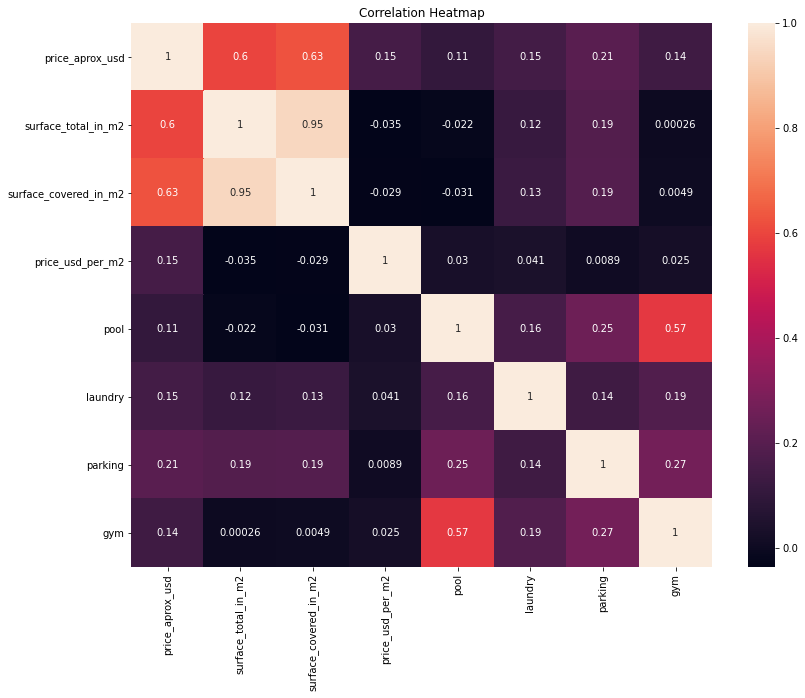

In [79]:
cols = ['price_aprox_usd', 'surface_total_in_m2','surface_covered_in_m2', 
        'price_usd_per_m2', 'rooms','pool', 'laundry', 'parking', 'gym']

#Mapa de correlación

plt.figure(figsize=(13,10))
sns.heatmap(data_caba_clean[cols].corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

<a id="section_model"></a> 
<h3>Modelos de Regresión Lineal</h3>

[volver a TOC](#section_toc)

In [80]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics, linear_model

In [81]:
# Funcion para realizar el entrenamiento pero con un set de testeo.

# Visualización de datos predichos para incluir en las funciones
def graf_lineal_model(X, y, y_pred):
    # Graficamos el modelo
    plt.scatter(y_pred, y, s=30, c='b', alpha=0.4)
    plt.plot(y,y, '-.',c='g')
    plt.show()
    print(y.shape)
    print(y_pred.shape)
    return

def train_test_error(feature_cols, target):
    X = data_caba_clean[feature_cols]
    y = data_caba_clean[target].values.ravel()
    
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=10)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
#   print (feature_cols)
#   print ("y_test sample: ",y_test.values[0:10])
#   print ("y_test sample: ",y_test)
#   print ("y_pred sample: ",y_pred[0:20].astype(int))
#   print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
#   print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('R2:', metrics.r2_score(y_test, y_pred))
    graf_lineal_model(X, y_test, y_pred)
    return 

def train_test_error_lasso(feature_cols, target):
    X = data_caba_clean[feature_cols]
    y = data_caba_clean[target].values.ravel()
    
#   cv = KFold(5, shuffle=True)
    cv = 3
    # OJO que no trabajamos con tiempo por lo tanto debe ser shuffle=True.
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    
    model = linear_model.LassoCV(alphas=np.linspace(0.00001,0.1, 1000), normalize=True).fit(X_train, y_train)
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    
    y_pred = model.predict(X_train)
    print(dict(alpha=model.alpha_, scores=scores, mean_score=scores.mean(), zero_coefs=(model.coef_ == 0).sum()))
    print ("r^2:", model.score(X, y))
    print ("Imprime Alpha", model.alpha_)
    graf_lineal_model(X, y_train, y_pred)
    return 

def train_test_error_ridge(feature_cols, target):
    X = data_caba_clean[feature_cols]
    y = data_caba_clean[target].values.ravel()
    
#   cv = KFold(5, shuffle=True)
    cv = 3
    # OJO que no trabajamos con tiempo por lo tanto debe ser shuffle=True.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    
    #model = linear_model.Ridge(alpha=0.5, normalize=True).fit(X_train, y_train)
    model = linear_model.RidgeCV(alphas=np.linspace(0.00001,0.1, 1000), normalize=True).fit(X_train, y_train)#agr
    
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    
    y_pred = model.predict(X_train)
    print(dict(alpha=model.alpha_, scores=scores, mean_score=scores.mean(), zero_coefs=(model.coef_ == 0).sum()))
    print ("r^2:", model.score(X, y))
    print ("Coeficientes de la regresión", model.coef_)
    graf_lineal_model(X, y_train, y_pred)
    return 

def train_test_error_elastic(feature_cols, target):
    X = data_caba_clean[feature_cols]
    y = data_caba_clean[target].values.ravel()
#     cv = KFold(5, shuffle=True)
    cv = 3
    # OJO que no trabajamos con tiempo por lo tanto debe ser shuffle=True.
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
    
    model = linear_model.ElasticNetCV(alphas=np.linspace(0.00001,0.1, 1000), normalize=True).fit(X_train, y_train)
    
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='r2')
    
    y_pred = model.predict(X_train)
    print(dict(alpha=model.alpha_, scores=scores, mean_score=scores.mean(), zero_coefs=(model.coef_ == 0).sum()))
    print ("r^2:", model.score(X, y))
    print ("Coeficientes de la regresión", model.coef_)
    graf_lineal_model(X, y_train, y_pred)
    return 

<a id="section_variables"></a> 
<h3>Variables</h3>

[volver a TOC](#section_toc)

Armamos objetos con las listas de variables cualitativas para poder utilizarlas más económicamente

In [ ]:
display(data_caba_clean.columns)

In [82]:
feature_cols_places = list(place_name_dummies)
feature_cols_prop = list(property_type_dummies)
feature_cols_labels = list(m2_labels_dummies)
feature_cols_rooms = list(rooms_dummies)
# feature_cols = ['price_aprox_usd','surface_covered_in_m2','surface_total_in_m2',
#                'pool', 'laundry', 'parking', 'gym']

target = ['price_usd_per_m2']


<a id="section_test1"></a> 
<h3>Primeras pruebas de regresión simple y múltiple</h3>

[volver a TOC](#section_toc)

RMSE: 3243.445002950546
R2: -0.12312164235137124


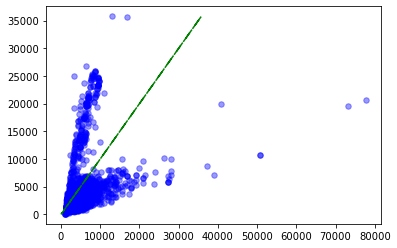

(6345,)
(6345,)


In [83]:
# Regresion lineal Simple
feature_cols = ['price_aprox_usd']
train_test_error(feature_cols, target)


RMSE: 3518.591234379396
R2: -0.32175618839268183


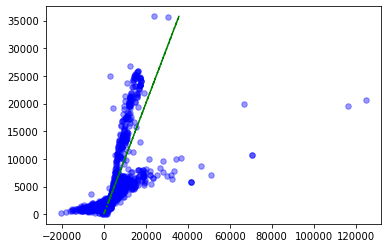

(6345,)
(6345,)


In [84]:
#Agregamos algunas variables cuantitativas
feature_cols = ['price_aprox_usd', 'surface_covered_in_m2', 'surface_total_in_m2']
train_test_error(feature_cols, target)

RMSE: 3496.0672489756466
R2: -0.30488811474385646


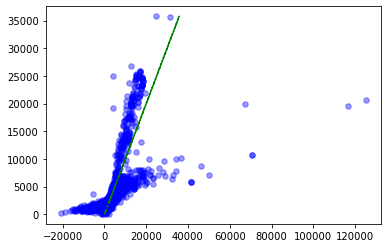

(6345,)
(6345,)


In [85]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym']

train_test_error(feature_cols, target)

RMSE: 3419.7958980260933
R2: -0.24857344401178416


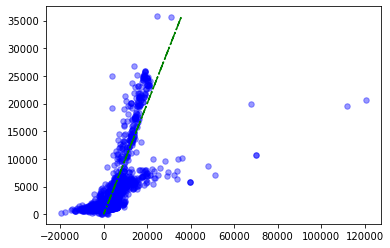

(6345,)
(6345,)


In [86]:
#Agregamos las dummies de place_name como variables
feature_cols.extend(feature_cols_places)
train_test_error(feature_cols, target)

RMSE: 3441.2944853624385
R2: -0.2643211313514182


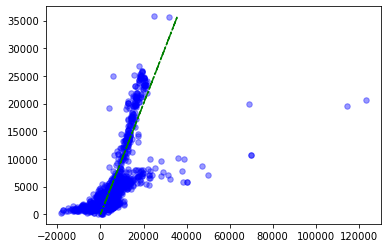

(6345,)
(6345,)


In [87]:
#agregamos también el tipo de propiedad
feature_cols.extend(feature_cols_prop)
train_test_error(feature_cols, target)

Observamos que al agregar más variables mejora un poco el resultado del R2 (ya no es negativo) pero de todas maneras es muy bajo.

<a id="section_test_lasso1"></a> 
<h3>Pruebas con modelo Lasso</h3>

[volver a TOC](#section_toc)

{'alpha': 1e-05, 'scores': array([-0.08393805,  0.03333683,  0.17368367]), 'mean_score': 0.041027481427283, 'zero_coefs': 0}
r^2: 0.04896038001094738
Imprime Alpha 1e-05


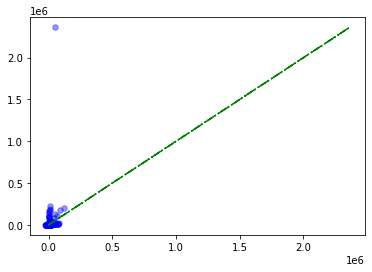

(19033,)
(19033,)


In [88]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym']
train_test_error_lasso(feature_cols, target)

In [ ]:
# feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
#                 'pool', 'laundry', 'parking', 'gym', 'place_name_Puerto Madero']
# train_test_error_lasso(feature_cols, target)

<a id="section_outliers"></a> 
<h3>Definción de outliers</h3>

[volver a TOC](#section_toc)

Luego de estas pruebas, notamos que es necesario definir y eliminar Outiliers tanto en el target como en algunas de las variables

<h4>Price_usd_per_m2</h4>

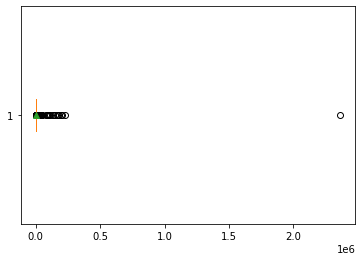

In [89]:
fig, ax = plt.subplots()
bp = ax.boxplot(data_caba_clean['price_usd_per_m2'].dropna(), vert=False, showmeans=True)

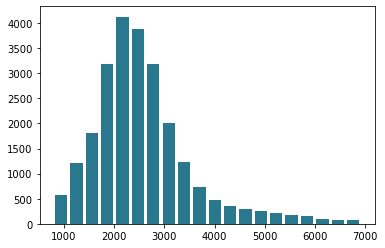

In [93]:
#Grafico de distribución de la variable target antes de eliminar datos extremos
plt.hist(data_caba_clean.price_usd_per_m2, bins=20, rwidth=0.8, color = '#29788E')
plt.xlabel = 'Precio x M2'
plt.ylabel = 'Count'
plt.show()

In [91]:
# Definimos outliers aproximados
lower_bound = 0.01
upper_bound = 0.96
rest = data_caba_clean.price_usd_per_m2.quantile([lower_bound, upper_bound])
rest

0.01     793.430999
0.96    6912.292533
Name: price_usd_per_m2, dtype: float64

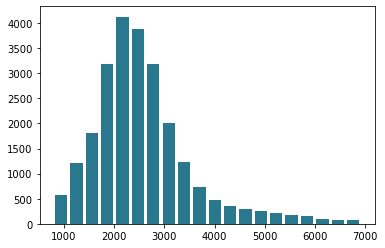

6910.569105691057
793.6507936507936


In [92]:
# Creamos una mask entendiendo que los precios minimos y maximos pueden rondar los 600 USD y 4000 USD y fijamos outliers aproximados

precioxm2_mask = (data_caba_clean.price_usd_per_m2 >= rest[0.01]) & (data_caba_clean.price_usd_per_m2 <= rest[0.96])
data_caba_clean = data_caba_clean.loc[precioxm2_mask, :]

# Volvemos a graficar

plt.hist(data_caba_clean.price_usd_per_m2, bins=20, rwidth=0.8, color = '#29788E')
plt.xlabel = 'Precio x M2'
plt.ylabel = 'Count'
plt.show()

print(data_caba_clean.price_usd_per_m2.max()) 
print(data_caba_clean.price_usd_per_m2.min())

# Parece una distribución normal? sino fuera por los valores elevados que tenemos a partir de los 4000...

<h4>Surface_covered_in_m2</h4>

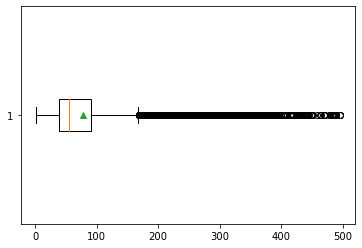

In [94]:
fig, ax = plt.subplots()
bp = ax.boxplot(data_caba_clean['surface_covered_in_m2'].dropna(), vert=False, showmeans=True)

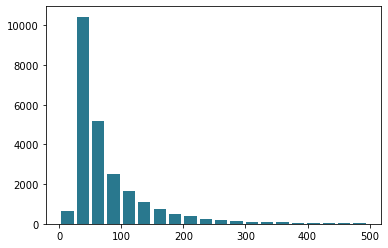

In [95]:
#Grafio de la distribucion de superficie antes de eliminar outliers
plt.hist(data_caba_clean.surface_covered_in_m2, bins=20, rwidth=0.8, color = '#29788E')
plt.xlabel = 'Superficie x M2'
plt.ylabel = 'Count'
plt.show()

In [96]:
# Definimos outliers aproximados
lower_bound = 0.001
upper_bound = 0.99
rest = data_caba_clean.surface_covered_in_m2.quantile([lower_bound, upper_bound])
rest

0.001     12.0
0.990    350.0
Name: surface_covered_in_m2, dtype: float64

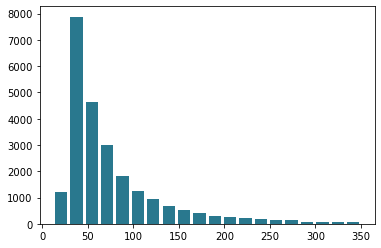

350.0
12.0


In [97]:
surface_xm2_mask = (data_caba_clean.surface_covered_in_m2 >= rest[0.001]) & (data_caba_clean.surface_covered_in_m2 <= rest[0.99])
data_caba_clean = data_caba_clean.loc[surface_xm2_mask, :]

# Graficamos la distribución actual de superficie cubierta

plt.hist(data_caba_clean.surface_covered_in_m2, bins=20, rwidth=0.8, color = '#29788E')
plt.xlabel = 'Superficie x M2'
plt.ylabel = 'Count'
plt.show()

print(data_caba_clean.surface_covered_in_m2.max()) 
print(data_caba_clean.surface_covered_in_m2.min())

# Parece una distribución normal? sino fuera por los valores elevados que tenemos a partir de los 3500...

In [98]:
#Chequeo que no hayan quedado datos nulos en rooms y se pueda usar como Variable
data_caba_clean.rooms.isnull().sum()

0

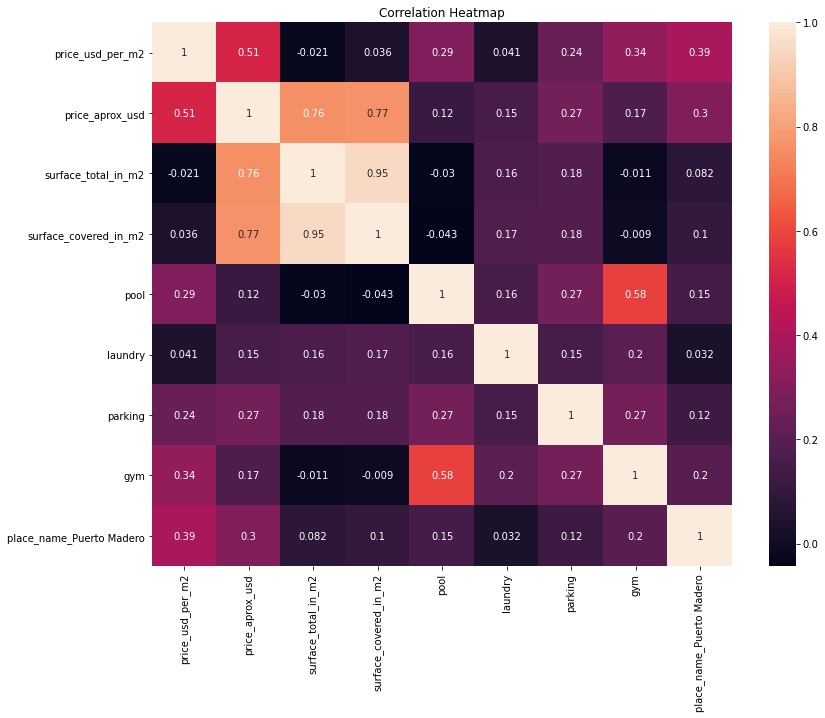

In [100]:
#Nuevo mapa de correlación
X = data_caba_clean[['price_usd_per_m2','price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
        'pool', 'laundry', 'parking', 'gym', 'place_name_Puerto Madero']]

plt.figure(figsize=(13,10))
sns.heatmap(X.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

<a id="section_test2"></a> 
<h3>Nuevas pruebas con datos ajustados</h3>

[volver a TOC](#section_toc)

RMSE: 839.7560668520462
R2: 0.26346118174302735


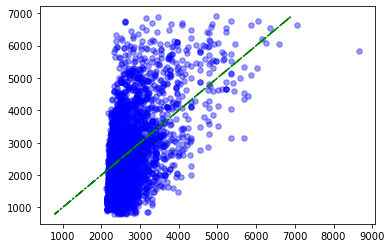

(5967,)
(5967,)


In [101]:
#Regresión lineal simple con datos ajustados. Aún con una sola variable notamos una mejora sustancial
feature_cols = ['price_aprox_usd']
train_test_error(feature_cols, target)

RMSE: 542.3317564226966
R2: 0.6928012732418756


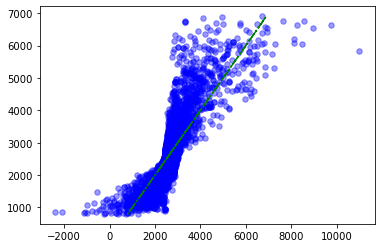

(5967,)
(5967,)


In [102]:
#Regresión lineal con variables base
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym']
train_test_error(feature_cols, target)

RMSE: 479.7906970840066
R2: 0.7595676028949103


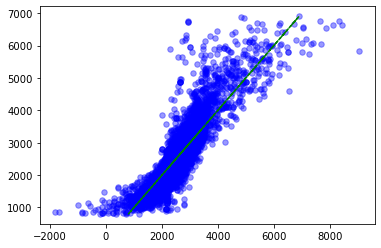

(5967,)
(5967,)


In [103]:
#Agregamos a las features de arriba las dummies de place_name
feature_cols.extend(feature_cols_places)
train_test_error(feature_cols, target)

RMSE: 471.52192561189423
R2: 0.7677834734678952


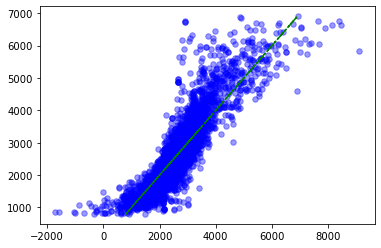

(5967,)
(5967,)


In [106]:
#Agregamos las dummies de prop_type
feature_cols.extend(feature_cols_prop)
train_test_error(feature_cols, target)

RMSE: 471.5219256117573
R2: 0.7677834734680302


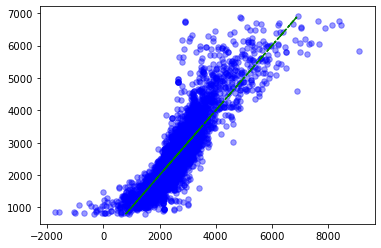

(5967,)
(5967,)


In [107]:
#Prueba de Regresión lineal con todas las dummies y todas las variables
feature_cols.extend(feature_cols_labels)
train_test_error(feature_cols, target)

RMSE: 470.18518468671425
R2: 0.7690982514860202


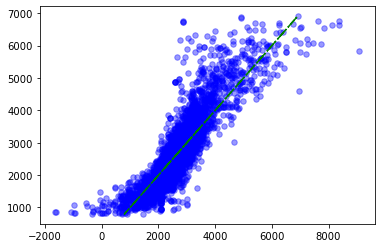

(5967,)
(5967,)


In [108]:
feature_cols.extend(feature_cols_rooms)
train_test_error(feature_cols, target)

<a id="section_test_lasso2"></a> 
<h3>Nuevas pruebas de Modelo Lasso con datos ajustados</h3>

[volver a TOC](#section_toc)

{'alpha': 0.006515855855855857, 'scores': array([0.67089138, 0.67659174, 0.67454671]), 'mean_score': 0.6740099440143728, 'zero_coefs': 0}
r^2: 0.6795239838619834
Imprime Alpha 0.006515855855855857


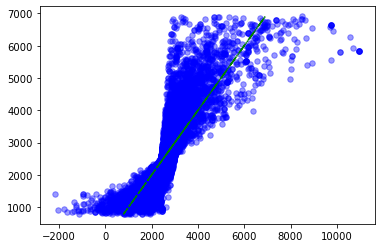

(17899,)
(17899,)


In [109]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym']
train_test_error_lasso(feature_cols, target)

{'alpha': 0.007416666666666667, 'scores': array([0.74135722, 0.74744989, 0.74783505]), 'mean_score': 0.7455473899718797, 'zero_coefs': 3}
r^2: 0.7508667094383815
Imprime Alpha 0.007416666666666667


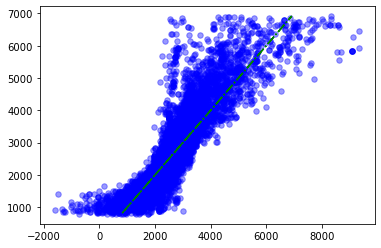

(17899,)
(17899,)


In [110]:
feature_cols.extend(feature_cols_places)
train_test_error_lasso(feature_cols, target)

{'alpha': 0.0018116216216216218, 'scores': array([0.75188457, 0.75332872, 0.75590057]), 'mean_score': 0.7537046219094372, 'zero_coefs': 1}
r^2: 0.7588441428842883
Imprime Alpha 0.0018116216216216218


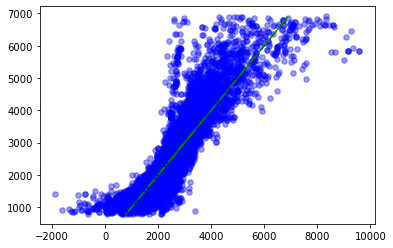

(17899,)
(17899,)


In [111]:
feature_cols.extend(feature_cols_prop)
train_test_error_lasso(feature_cols, target)

{'alpha': 0.0012110810810810812, 'scores': array([0.7556832 , 0.75768472, 0.75723155]), 'mean_score': 0.7568664897294354, 'zero_coefs': 4}
r^2: 0.7619504741538113
Imprime Alpha 0.0012110810810810812


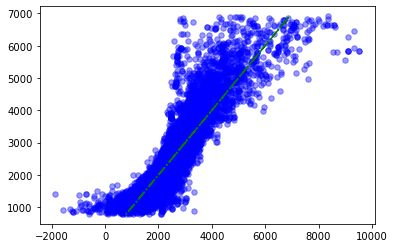

(17899,)
(17899,)


In [112]:
feature_cols.extend(feature_cols_labels)
train_test_error_lasso(feature_cols, target)

{'alpha': 0.0007106306306306308, 'scores': array([0.75785206, 0.76011912, 0.7572353 ]), 'mean_score': 0.7584021586577, 'zero_coefs': 0}
r^2: 0.7637997424622025
Imprime Alpha 0.0007106306306306308


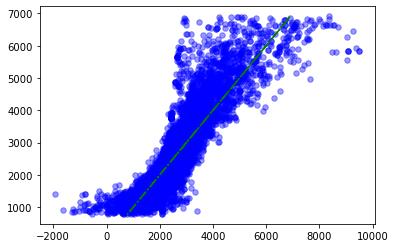

(17899,)
(17899,)


In [113]:
feature_cols.extend(feature_cols_rooms)
train_test_error_lasso(feature_cols, target)

Los resultados con Lasso son muy parecidos a los de las LinearRegression, pero no la mejoran

<a id="section_test_ridge"></a> 
<h3>Pruebas con modelo Ridge</h3>

[volver a TOC](#section_toc)

{'alpha': 0.0012110810810810812, 'scores': array([0.57379519, 0.58174577, 0.55488568]), 'mean_score': 0.5701422145015306, 'zero_coefs': 0}
r^2: 0.5760602908375867
Coeficientes de la regresión [ 5.14789338e-03 -1.47762247e+01]


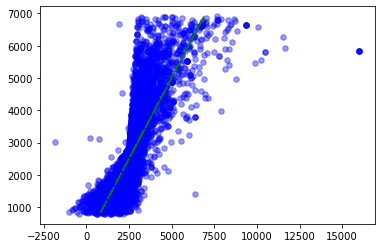

(17899,)
(17899,)


In [114]:
feature_cols = ['price_aprox_usd', 'surface_covered_in_m2']
train_test_error_ridge(feature_cols, target)

{'alpha': 0.0008107207207207209, 'scores': array([0.6706814 , 0.67626328, 0.67447548]), 'mean_score': 0.6738067209732446, 'zero_coefs': 0}
r^2: 0.6795374170632223
Coeficientes de la regresión [ 5.10641920e-03 -1.26354900e+01 -2.65040698e-01  1.56244015e+02
 -5.19772387e+01  1.13910171e+02  2.47603110e+02]


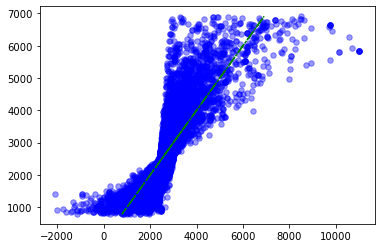

(17899,)
(17899,)


In [115]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym']
train_test_error_ridge(feature_cols, target)

{'alpha': 0.0005104504504504506, 'scores': array([0.74118163, 0.74734542, 0.74790995]), 'mean_score': 0.7454789978588746, 'zero_coefs': 0}
r^2: 0.7509342443636772
Coeficientes de la regresión [ 4.08374327e-03 -1.10706786e+01  6.89093951e-02  1.35060852e+02
 -5.40109131e+01  1.17780900e+02  2.25764437e+02 -1.26304273e+01
  6.43655904e+01 -1.12112202e+02 -1.03372370e+02  4.94122203e+02
  5.14590388e+02 -3.44836938e+02 -2.55421424e+01  1.39254341e+02
  5.84555886e+02  1.68578637e+02 -6.73111081e+01  2.28392715e+02
  2.41237097e+02 -1.73261777e+02 -2.73647263e+02 -7.73681083e+01
 -1.31061471e+02  7.97411081e+02 -8.54055575e+01 -8.70633838e+01
 -1.06478847e+02 -1.30833294e+02  3.73828791e+02 -8.54783885e+01
  5.65540182e+02  7.69965548e+02  5.67555748e+02  6.55332301e+02
  5.09710725e+02 -2.30862905e+02  1.75945443e+02 -6.98570209e+01
 -8.16630597e+01 -1.88090489e+02 -7.75369533e+01 -2.88388531e+02
  1.31176351e+03  6.18696493e+02  3.57339671e+02  7.60277824e+01
  4.16755136e+01  2.85197581

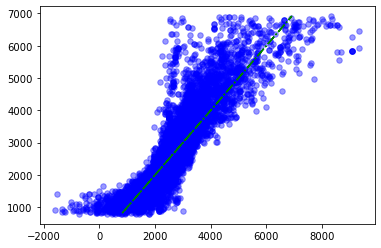

(17899,)
(17899,)


In [116]:
#Prueba de Ridge con variables base + dummies de place_name
feature_cols.extend(feature_cols_places)
train_test_error_ridge(feature_cols, target)

{'alpha': 0.0006105405405405406, 'scores': array([0.75172376, 0.75349683, 0.75585452]), 'mean_score': 0.7536917057796372, 'zero_coefs': 0}
r^2: 0.7588289099204841
Coeficientes de la regresión [ 4.21185722e-03 -1.15492390e+01 -5.45301844e-01  1.38260989e+02
 -3.31435537e+01  1.25695814e+02  2.26448143e+02 -1.02132812e+01
  7.13452414e+01 -9.31803663e+01 -9.74062388e+01  5.14164639e+02
  5.29182500e+02 -3.35487060e+02 -5.33455307e+01  1.51921531e+02
  8.17560709e+02  1.19759676e+02 -6.94458107e+01  2.20575186e+02
  2.32683811e+02 -1.61754419e+02 -2.88531139e+02 -8.30561244e+01
 -1.49326636e+02  8.18807804e+02 -1.10512460e+02 -1.43265566e+02
 -1.08414834e+02 -1.33445237e+02  3.74906770e+02 -6.72503680e+01
  5.72725303e+02  7.97016825e+02  5.59130945e+02  6.53566652e+02
  4.62675419e+02 -2.81630693e+02  2.09280890e+02 -1.16335129e+02
 -1.43574578e+02 -1.94751011e+02 -1.02958114e+02 -3.65055235e+02
  1.31304914e+03  6.47850689e+02  3.80157438e+02  6.37639430e+01
  4.02277792e+01  3.92354956

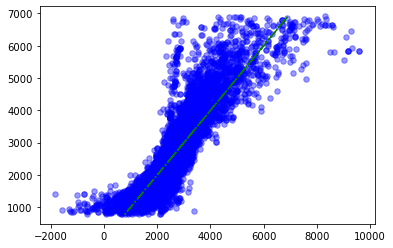

(17899,)
(17899,)


In [117]:
#Prueba de Ridge con variables base + dummies de place_name + dummies de prop_type
feature_cols.extend(feature_cols_prop)
train_test_error_ridge(feature_cols, target)

{'alpha': 0.0006105405405405406, 'scores': array([0.75285876, 0.75414539, 0.7548853 ]), 'mean_score': 0.7539631479870085, 'zero_coefs': 0}
r^2: 0.7594466846447128
Coeficientes de la regresión [ 4.22756465e-03 -1.16050199e+01 -1.16075097e+00  1.42280518e+02
 -3.37873188e+01  1.27694707e+02  2.27013222e+02  5.22182826e+00
  7.62783799e+01 -9.07569136e+01 -9.17654844e+01  5.16396731e+02
  5.34518837e+02 -3.35868441e+02 -4.07593359e+01  1.54522223e+02
  8.88394701e+02  1.22344081e+02 -6.53000801e+01  2.26466995e+02
  2.38557292e+02 -1.56089695e+02 -2.76349744e+02 -7.65060488e+01
 -1.47552919e+02  8.28205270e+02 -1.02286071e+02 -1.31976367e+02
 -9.87346459e+01 -1.19389163e+02  3.80386018e+02 -6.26573173e+01
  5.77860730e+02  8.06864685e+02  5.61034112e+02  6.61242555e+02
  4.67095327e+02 -2.73753595e+02  2.03917531e+02 -1.11677581e+02
 -1.30849831e+02 -1.99752491e+02 -9.60712122e+01 -3.65547597e+02
  1.33163528e+03  6.51960216e+02  3.83659668e+02  6.80997515e+01
  4.73157828e+01  4.03561309

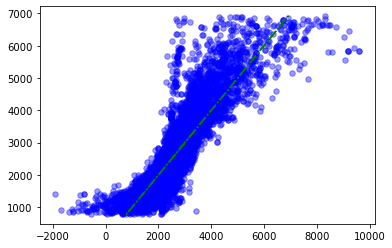

(17899,)
(17899,)


In [118]:
feature_cols.extend(feature_cols_rooms)
train_test_error_ridge(feature_cols, target)

Lo mismo se observa con el modelo Ridge, los resultados obtenidos son muy similares, pero no mejoran el modelo inicial. 

<a id="section_test_elastic"></a> 
<h3>Pruebas con modelo Elastic</h3>

[volver a TOC](#section_toc)

{'alpha': 1e-05, 'scores': array([0.64621272, 0.66061844, 0.65527096]), 'mean_score': 0.6540340383904021, 'zero_coefs': 0}
r^2: 0.6406592044567363
Coeficientes de la regresión [ 3.93884450e-03 -7.18282010e+00 -2.76689365e+00  1.74369079e+02
 -6.02483354e+01  1.34999431e+02  3.38240746e+02]


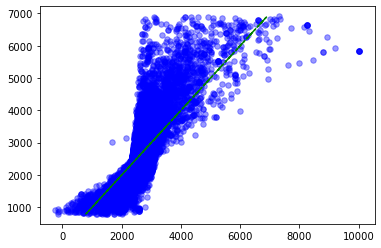

(17899,)
(17899,)


In [119]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2',
                'pool', 'laundry', 'parking', 'gym']
train_test_error_elastic(feature_cols, target)

{'alpha': 1e-05, 'scores': array([0.72284811, 0.73550712, 0.73498021]), 'mean_score': 0.731111811228126, 'zero_coefs': 0}
r^2: 0.7239602515786945
Coeficientes de la regresión [ 2.99360515e-03 -6.08600849e+00 -2.32014913e+00  1.46980480e+02
 -5.76680589e+01  1.32676045e+02  2.88846961e+02 -3.02917011e+02
 -1.64196179e+02 -3.44760760e+02 -3.61572387e+02  3.15619133e+02
  3.20343456e+02 -5.86573216e+02 -2.70693814e+02 -8.66394307e+01
  1.69379313e+02 -3.81980028e+01 -2.82546214e+02 -5.33345189e+00
  4.17357191e+00 -4.07792444e+02 -4.92278221e+02 -3.09193322e+02
 -3.94572917e+02  6.18859101e+02 -3.70245251e+02 -3.99436106e+02
 -3.28732955e+02 -3.94556489e+02  1.81814506e+02 -3.11809055e+02
  3.84479064e+02  7.75764480e+02  3.60872150e+02  4.33229327e+02
  3.32257972e+02 -5.33244641e+02 -7.32835301e+01 -3.51078406e+02
 -2.87908368e+02 -4.28252138e+02 -3.24710231e+02 -5.83443163e+02
  1.38065630e+03  4.65807277e+02  2.22234532e+02 -1.74842304e+02
 -1.98205433e+02 -2.06202988e+02 -2.25052463e

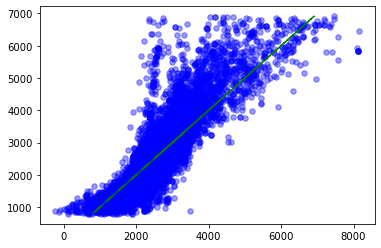

(17899,)
(17899,)


In [120]:
feature_cols.extend(feature_cols_places)
train_test_error_elastic(feature_cols, target)

{'alpha': 1e-05, 'scores': array([0.73063493, 0.7402786 , 0.74027953]), 'mean_score': 0.7370643512119498, 'zero_coefs': 0}
r^2: 0.7282812696514711
Coeficientes de la regresión [ 2.97576825e-03 -6.03617278e+00 -2.52587305e+00  1.50170119e+02
 -4.12400921e+01  1.41942907e+02  2.87907297e+02 -3.02074953e+02
 -1.62786069e+02 -3.46951644e+02 -3.54350390e+02  3.14098506e+02
  3.23620962e+02 -5.77915656e+02 -2.81411577e+02 -8.30428226e+01
  2.22250172e+02 -9.74779730e+01 -2.82305692e+02 -4.17670680e+00
  7.68088055e+00 -4.20013268e+02 -5.05285048e+02 -3.13629989e+02
 -3.83724404e+02  6.23347699e+02 -3.59259789e+02 -3.81836404e+02
 -3.40398014e+02 -3.79524038e+02  1.82809507e+02 -3.17062145e+02
  3.85863185e+02  7.94090057e+02  3.54306797e+02  4.31928249e+02
  3.14236789e+02 -5.09810670e+02 -6.68732959e+01 -3.38580205e+02
 -2.92395467e+02 -4.31740371e+02 -3.19066245e+02 -5.87085948e+02
  1.39388481e+03  4.69148927e+02  2.16860211e+02 -1.74196105e+02
 -2.02674743e+02 -2.15113085e+02 -2.30681497

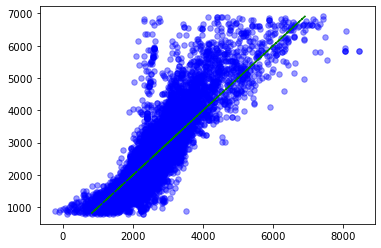

(17899,)
(17899,)


In [121]:
feature_cols.extend(feature_cols_prop)
train_test_error_elastic(feature_cols, target)

<a id="section_new_features"></a> 
<h3>Creación de features para complejizar el modelo</h3>

[volver a TOC](#section_toc)

Creamos nuevas features para complejizar el modelo y testeamos nuevamente con todos los modelos

<a id="section_sup2"></a> 
<h4>Superficie<sup>2</sup></h4>

[volver a TOC](#section_toc)

In [122]:
#Creo una nueva feature a partir de una existente para complejizar el modelo y tratar de obtener un R^2 más elevado
data_caba_clean['surface_covered_in_m2_2']=data_caba_clean['surface_covered_in_m2']**2
data_caba_clean['surface_covered_in_m2_3']=data_caba_clean['surface_covered_in_m2']**3
data_caba_clean.head()

,property_type,place_name,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,rooms,description,m2_categories,m2_labels,pool,laundry,parking,gym,prop_type_apartment,prop_type_house,prop_type_store,m2_label_s45,m2_label_s75,m2_label_s150,m2_label_s220,m2_label_s500,place_name_Agronomía,place_name_Almagro,place_name_Balvanera,place_name_Barracas,place_name_Barrio Norte,place_name_Belgrano,place_name_Boca,place_name_Boedo,place_name_Caballito,place_name_Catalinas,place_name_Centro / Microcentro,place_name_Chacarita,place_name_Coghlan,place_name_Colegiales,place_name_Congreso,place_name_Constitución,place_name_Flores,place_name_Floresta,place_name_Las Cañitas,place_name_Liniers,place_name_Mataderos,place_name_Monserrat,place_name_Monte Castro,place_name_Nuñez,place_name_Once,place_name_Palermo,place_name_Palermo Chico,place_name_Palermo Hollywood,place_name_Palermo Soho,place_name_Palermo Viejo,place_name_Parque Avellaneda,place_name_Parque Centenario,place_name_Parque Chacabuco,place_name_Parque Chas,place_name_Parque Patricios,place_name_Paternal,place_name_Pompeya,place_name_Puerto Madero,place_name_Recoleta,place_name_Retiro,place_name_Saavedra,place_name_San Cristobal,place_name_San Nicolás,place_name_San Telmo,place_name_Tribunales,place_name_Velez Sarsfield,place_name_Versalles,place_name_Villa Crespo,place_name_Villa Devoto,place_name_Villa General Mitre,place_name_Villa Lugano,place_name_Villa Luro,place_name_Villa Ortuzar,place_name_Villa Pueyrredón,place_name_Villa Real,place_name_Villa Riachuelo,place_name_Villa Santa Rita,place_name_Villa Soldati,place_name_Villa Urquiza,place_name_Villa del Parque,rooms_2,rooms_3,rooms_4,rooms_5,rooms_6,surface_covered_in_m2_2,surface_covered_in_m2_3
0,PH,Mataderos,62000.0,55.0,40.0,1127.272727,2,"2 ambientes tipo casa planta baja por pasillo,...","(30, 45]",s45,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1600.0,64000.0
2,apartment,Mataderos,72000.0,55.0,55.0,1309.090909,2,2 ambientes 3er piso lateral living comedor am...,"(45, 75]",s75,0.0,1.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,3025.0,166375.0
7,apartment,Belgrano,138000.0,45.0,40.0,3066.666667,2,excelente monoambiente a estrenar amplio super...,"(30, 45]",s45,1.0,1.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1600.0,64000.0
8,apartment,Belgrano,195000.0,65.0,60.0,3000.000000,3,excelente dos ambientes estrenar amplio super...,"(45, 75]",s75,1.0,1.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3600.0,216000.0
13,apartment,Palermo Soho,111700.0,50.0,30.0,2234.000000,1,torre i mondrian. 3 ambientes con terraza y d...,"(0, 30]",s45,1.0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,900.0,27000.0


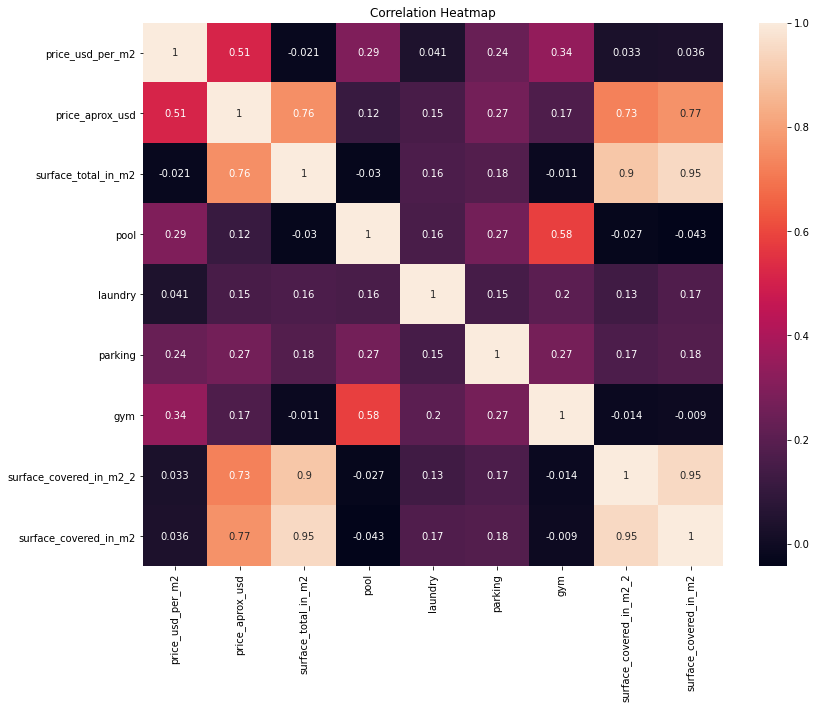

In [123]:
# tomo las nueva feature 'surface_covered_in_m2_2'
X = data_caba_clean[['price_usd_per_m2','price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                     'surface_covered_in_m2_2','surface_covered_in_m2']]

plt.figure(figsize=(13,10))
sns.heatmap(X.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

RMSE: 542.3655703585652
R2: 0.6927629648752656


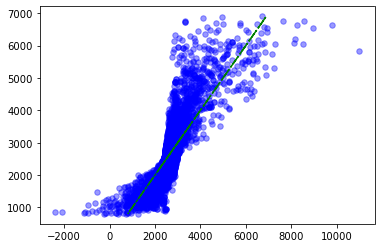

(5967,)
(5967,)


In [124]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2']
train_test_error(feature_cols, target)

{'alpha': 0.017125405405405407, 'scores': array([0.67062814, 0.67641467, 0.67373107]), 'mean_score': 0.6735912930693905, 'zero_coefs': 1}
r^2: 0.6794002935592924
Imprime Alpha 0.017125405405405407


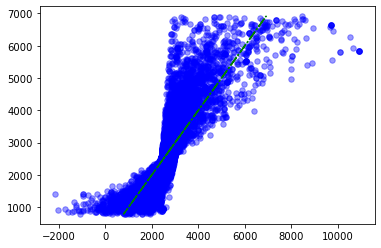

(17899,)
(17899,)


In [125]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2']
train_test_error_lasso(feature_cols, target)

{'alpha': 0.0009108108108108109, 'scores': array([0.66997709, 0.67613782, 0.67345292]), 'mean_score': 0.6731892750440007, 'zero_coefs': 0}
r^2: 0.679543160029292
Coeficientes de la regresión [ 5.10530356e-03 -1.26192580e+01  1.55186368e+02 -5.07809068e+01
  1.14212679e+02  2.48228401e+02 -5.60007777e-01  1.02879448e-03]


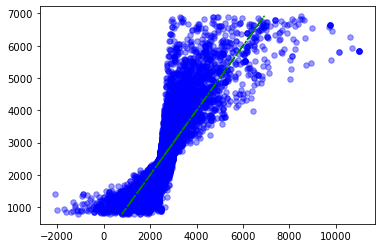

(17899,)
(17899,)


In [126]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2']
train_test_error_ridge(feature_cols, target)

RMSE: 479.28105180628336
R2: 0.7600781178198377


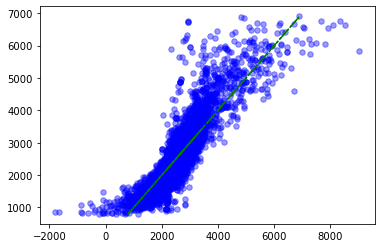

(5967,)
(5967,)


In [127]:
#Pruebo con todas las features y con la creada surface_covered_in_m2_2
feature_cols.extend(feature_cols_places)
train_test_error(feature_cols, target)

RMSE: 473.5303347847211
R2: 0.765801045747279


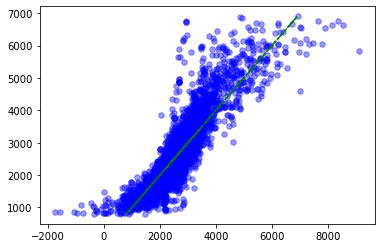

(5967,)
(5967,)


In [128]:
feature_cols.extend(feature_cols_prop)
train_test_error(feature_cols, target)

In [ ]:
train_test_error_lasso(feature_cols, target)

In [ ]:
train_test_error_ridge(feature_cols, target)

In [ ]:
train_test_error_elastic(feature_cols, target)

<a id="section_sup2"></a> 
<h4>Superficie<sup>3</sup></h4>

[volver a TOC](#section_toc)

In [ ]:
# agrego una nueva feature ('surface_covered_in_m2_3')

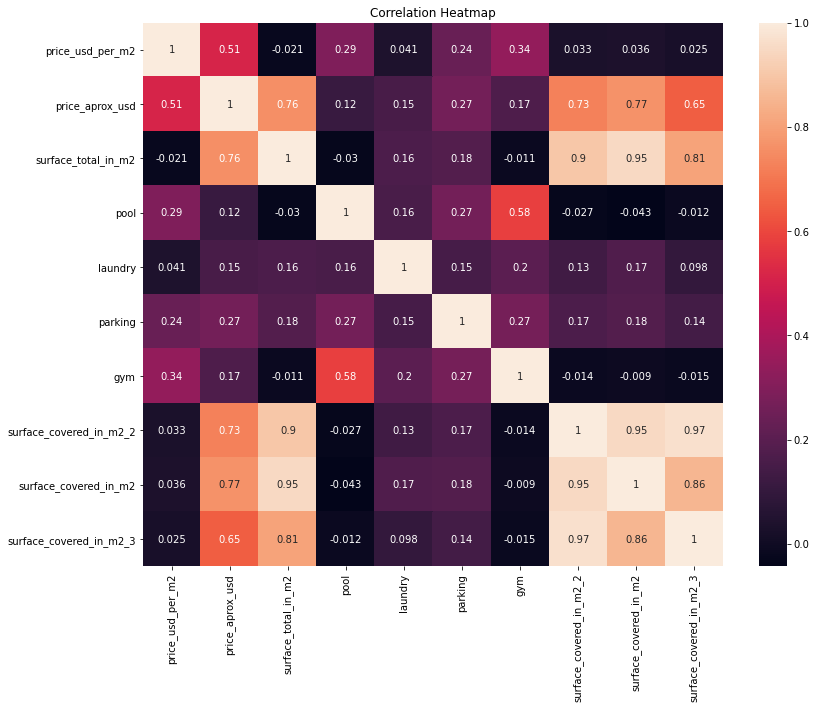

In [129]:
X = data_caba_clean[['price_usd_per_m2','price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                     'surface_covered_in_m2_2','surface_covered_in_m2','surface_covered_in_m2_3']]

plt.figure(figsize=(13,10))
sns.heatmap(X.corr(),annot=True)
plt.title("Correlation Heatmap")
plt.show()

RMSE: 542.4534847902879
R2: 0.6926633539856565


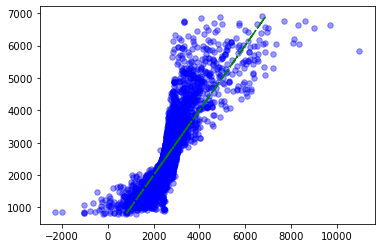

(5967,)
(5967,)


In [130]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2','surface_covered_in_m2_3']
train_test_error(feature_cols, target)

In [ ]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2','surface_covered_in_m2_3']
train_test_error_lasso(feature_cols, target)

In [ ]:
feature_cols = ['price_aprox_usd', 'surface_total_in_m2','pool', 'laundry', 'parking', 'gym',
                'surface_covered_in_m2','surface_covered_in_m2_2','surface_covered_in_m2_3']
train_test_error_ridge(feature_cols, target)

RMSE: 472.55894995008794
R2: 0.7667609165535785


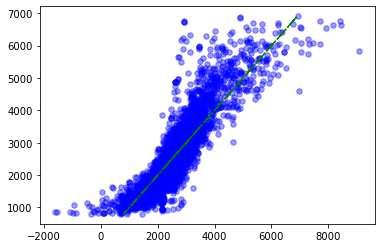

(5967,)
(5967,)


In [131]:
# con todas las features
feature_cols.extend(feature_cols_places)
feature_cols.extend(feature_cols_prop)
feature_cols.extend(feature_cols_rooms)
train_test_error(feature_cols, target)

In [ ]:
train_test_error_lasso(feature_cols, target)

{'alpha': 1e-05, 'scores': array([0.75434971, 0.75595383, 0.75511114]), 'mean_score': 0.7551382280910525, 'zero_coefs': 0}
r^2: 0.7609798192048064
Coeficientes de la regresión [ 4.20108064e-03 -1.15817064e+01  1.46049468e+02 -2.93883373e+01
  1.32555456e+02  2.26781525e+02 -8.11689344e+00  4.38287926e-02
 -7.40420560e-05  3.57171621e+01  1.11522571e+02 -5.38594344e+01
 -4.95402519e+01  5.55819934e+02  5.69588423e+02 -3.07782805e+02
 -1.93868862e+01  1.88457216e+02  8.04471406e+02  1.55385228e+02
 -3.72575149e+01  2.53040264e+02  2.80089158e+02 -1.15841185e+02
 -2.45982441e+02 -4.49962664e+01 -1.10634779e+02  8.66920691e+02
 -7.05252133e+01 -1.05944385e+02 -6.63922733e+01 -7.54375310e+01
  4.26330199e+02 -2.79950855e+01  6.16636040e+02  8.42569221e+02
  5.92465043e+02  6.93989721e+02  4.98196115e+02 -2.31632620e+02
  2.43668471e+02 -6.58749473e+01 -7.01149624e+01 -1.79697224e+02
 -6.25152252e+01 -3.22582377e+02  1.38997658e+03  6.94569421e+02
  4.18122117e+02  1.08189132e+02  8.42891722

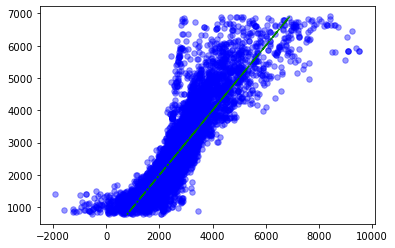

(17899,)
(17899,)


In [133]:
train_test_error_ridge(feature_cols, target)

{'alpha': 1e-05, 'scores': array([0.73042383, 0.74036621, 0.74008933]), 'mean_score': 0.7369597902282287, 'zero_coefs': 0}
r^2: 0.7279584349540764
Coeficientes de la regresión [ 2.98845656e-03 -5.93417730e+00  1.48944112e+02 -4.07047531e+01
  1.42059249e+02  2.87132832e+02 -2.23049825e+00 -1.88978439e-03
  1.61212846e-06 -3.01397785e+02 -1.61949927e+02 -3.45903945e+02
 -3.54407003e+02  3.14884788e+02  3.23094762e+02 -5.76171837e+02
 -2.77513140e+02 -8.30082241e+01  2.50732665e+02 -9.46317093e+01
 -2.82438303e+02 -6.08266073e+00  6.91932659e+00 -4.18126936e+02
 -5.02561620e+02 -3.13516515e+02 -3.84073830e+02  6.23467562e+02
 -3.59736762e+02 -3.83198259e+02 -3.37517286e+02 -3.81949221e+02
  1.79877235e+02 -3.16341171e+02  3.84819927e+02  7.92938227e+02
  3.53412214e+02  4.32080669e+02  3.13085399e+02 -5.10227720e+02
 -6.67301118e+01 -3.39871324e+02 -2.91986559e+02 -4.29697139e+02
 -3.17813432e+02 -5.87445451e+02  1.38817469e+03  4.69534260e+02
  2.18517172e+02 -1.76156612e+02 -2.02595513

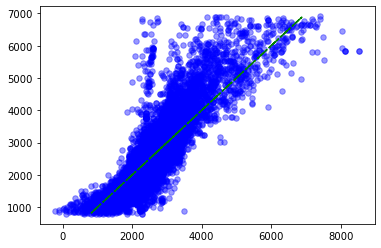

(17899,)
(17899,)


In [134]:
train_test_error_elastic(feature_cols, target)

In [ ]:
#últimas pruebas agregando features de tipo de propiedad
feature_cols.extend(feature_cols_prop)

In [ ]:
train_test_error(feature_cols, target)

In [ ]:
train_test_error_lasso(feature_cols, target)

In [ ]:
train_test_error_ridge(feature_cols, target)

In [ ]:
train_test_error_elastic(feature_cols, target)